In [41]:
# 필요한 모듈 다운

import os
import cv2
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, activations, utils, optimizers, metrics, losses

In [42]:
# keras에 내장된 mnist dataset 다운

mnist = tf.keras.datasets.mnist
# Dateset 로드하기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 shape 변경
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)




---



# **1. CNN**

# **CNN 직접 구현하기**

In [43]:
# 1. 모델 변수를 선언
model = models.Sequential()  # 순차적으로 레이어가 쌓이는 모델 

In [44]:
# 2. 모델에 입력 레이어 작성

# 컨볼루션 레이어 생성(커널 갯수,커널 사이즈) + 첫 번째 layer 라면 input shape 설정 
model.add(layers.Convolution2D(32, (3, 3), activation=activations.relu, input_shape=(28, 28, 1)))  
model.add(layers.MaxPooling2D(pool_size = (2,2)))  # 풀링 적용

In [45]:
# 3. 모델의 구현부 작성

model.add(layers.Convolution2D(64, (3, 3), activation=activations.relu)) # 컨볼루션 레이어 생성
model.add(layers.MaxPooling2D(pool_size = (2,2)))  # 풀링 적용

model.add(layers.Convolution2D(64, (3, 3), activation=activations.relu)) # 컨볼루션 레이어 생성


# fully connected layer(=dense layer) 레이어 만들기
model.add(layers.Flatten())  # 1차원  텐서로 변환하기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [46]:
# 4. 모델 구조 출력하기
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               



---



# **CNN 학습시키기**

seven.png
<br>분류하기

In [47]:
# CNN 모델 컴파일 
adam_optimizer = optimizers.Adam()
loss_function = losses.sparse_categorical_crossentropy
metric = metrics.categorical_accuracy
model.compile(optimizer=adam_optimizer,
              loss=loss_function,
              metrics=[metric])

In [48]:
# 모델을 학습
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 58s 31ms/step - loss: 0.1475 - categorical_accuracy: 0.0993


In [49]:
# 모델 평가.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.0534 - categorical_accuracy: 0.0969


In [50]:
# 학습 결과 출력
print("test_loss:", test_loss, "test_acc:", test_acc)

test_loss: 0.05344467610120773 test_acc: 0.09690000116825104


In [51]:
# 모델에 테스트 이미지를 넣고 예측값을 확인
test_img = cv2.imread("/content/drive/MyDrive/MNIST/images/seven.png", cv2.IMREAD_GRAYSCALE)

# 입력 이미지 정규화 
test_img = test_img / 255.0
row, col, channel = test_img.shape[0], test_img.shape[1], 1
confidence = model.predict(test_img.reshape((1, row, col, channel)))

**CNN 학습결과**

In [52]:
for i in range(confidence.shape[1]):
    print(f"{i} 일 확률 = {confidence[0][i]}")

print(f"정답은 : {numpy.argmax(confidence, axis=1)}")

0 일 확률 = 1.8277866331573023e-08
1 일 확률 = 4.0295722669725365e-07
2 일 확률 = 4.999054681320558e-07
3 일 확률 = 1.1488815289339982e-05
4 일 확률 = 1.534077220810559e-08
5 일 확률 = 4.239232680447458e-07
6 일 확률 = 6.312863565227644e-10
7 일 확률 = 0.9999793767929077
8 일 확률 = 1.5253867786668707e-06
9 일 확률 = 6.328663857857464e-06
정답은 : [7]




---



# **2. LeNet**

# **Lenet 직접 구현하기**

In [73]:
# 1. 모델 변수 선언
model2 = models.Sequential()
# 2. 모델에 입력 레이어 작성
model2.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32, 32, 1)))

# 3. 모델의 구현부 작성

model2.add(layers.AveragePooling2D((2,2), strides=(2,2)))
model2.add(layers.Conv2D(16,(5,5), strides=(1,1), activation='tanh'))
model2.add(layers.AveragePooling2D((2,2), strides=(2,2)))
model2.add(layers.Conv2D(120,(5,5), strides=(1,1), activation='tanh'))

model2.add(layers.Flatten())
model2.add(layers.Dense(84,'tanh'))
model2.add(layers.Dense(10, 'relu'))


# fully connected layer(=dense layer) 레이어 만들기
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD')


In [74]:
# 4. 모델 구조 출력하기
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_6 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 84)               



---



# **Lenet 학습시키기**

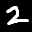
<br>분류하기

In [75]:
# keras에 내장된 mnist dataset 다운

mnist = tf.keras.datasets.mnist
# Dateset 로드하기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 shape 변경
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# LeNet의 입력은 32x32 이미지 이므로, 패딩을 주어서 28 x 28에서 32 x 32 이미지로 만듬.
train_images = numpy.pad(train_images, [[0, 0], [2,2], [2,2], [0,0]], 'constant')
test_images = numpy.pad(test_images, [[0, 0], [2,2], [2,2], [0,0]], 'constant')

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 32, 32, 1) (60000,) (10000, 32, 32, 1) (10000,)


In [76]:
# LeNet 모델을 컴파일
adam_optimizer = optimizers.Adam()
loss_function = losses.sparse_categorical_crossentropy
metric = metrics.categorical_accuracy
model2.compile(optimizer=adam_optimizer,
              loss=loss_function,
              metrics=[metric])

In [77]:
# 모델을 학습
model2.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 35s 18ms/step - loss: 1.8681 - categorical_accuracy: 0.0896


In [78]:
# 모델 평가.
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 1.8596 - categorical_accuracy: 0.0283


In [79]:
# 학습 결과 출력
print("test_loss:", test_loss, "test_acc:", test_acc)

test_loss: 1.8596454858779907 test_acc: 0.028300000354647636


In [80]:
# 모델에 테스트 이미지를 넣고 예측값을 확인
test_img = cv2.imread("/content/drive/MyDrive/MNIST/images/two.png", cv2.IMREAD_GRAYSCALE)

# 입력 이미지 정규화 
test_img = test_img / 255.0
row, col, channel = test_img.shape[0], test_img.shape[1], 1
confidence = model2.predict(test_img.reshape((1, row, col, channel)))

**LeNet 학습결과**

In [81]:
for i in range(confidence.shape[1]):
    print(f"{i} 일 확률 = {confidence[0][i]}")

print(f"정답은 : {numpy.argmax(confidence, axis=1)}")

0 일 확률 = 3.502070903778076
1 일 확률 = 0.0
2 일 확률 = 6.880424976348877
3 일 확률 = 0.12658420205116272
4 일 확률 = 0.7383018136024475
5 일 확률 = 0.0
6 일 확률 = 0.0
7 일 확률 = 0.0
8 일 확률 = 1.5359904766082764
9 일 확률 = 0.0
정답은 : [2]
